# Regularization : underfitting and overfiting

## Exercise 1: Load the dataset

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing

In [71]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [72]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## Exercise 2: Normalizing data

In [73]:
import numpy as np

In [74]:
def normalize_data(data): 
  results = np.zeros(data.shape)
  mean_value = data.mean(axis = 0)
  std_value = data.std(axis = 0)

  for i in range(len(data)): 
    row = data[i]
    for j in range(len(row)): 
      feature = row[j]
      results[i][j] = (feature - mean_value[j]) / (std_value[j] if std_value[j] != 0 else 1)
    
  return results


In [75]:
x_train = normalize_data(train_data)
x_test = normalize_data(test_data)

y_train = np.asarray(train_targets).astype('float32')
y_test = np.asarray(test_targets).astype('float32')

## Exercise 3: Model definition

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [77]:
def build_model(units = 64): 
  model = Sequential()
  
  model.add(Dense(units, activation = 'relu'))
  model.add(Dense(units, activation = 'relu'))
  model.add(Dense(1, activation = None))
  
  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

  return model

## Exercise 4: Model Validation

In [78]:
import time

In [82]:
def cross_validation(features, targets, k = 4, epochs = 100, units_per_hidden_layers = None, verbose = 1): 
  num_val_samples = len(features) // k
  all_scores, mae_history = [], []

  for i in range(k): 
    print(f'Processing fold #{i + 1}/{k}')
    _start = time.time()

    val_data = features[i * num_val_samples:(i+1) * num_val_samples]
    val_targets = targets[i * num_val_samples:(i+1) * num_val_samples]
    partial_train_data = np.concatenate([
                                         features[:i * num_val_samples], 
                                         features[(i+1) * num_val_samples:]
                                         ], axis = 0)
    partial_train_targets = np.concatenate([
                                         targets[:i * num_val_samples], 
                                         targets[(i+1) * num_val_samples:]
                                         ], axis = 0)
    
    if units_per_hidden_layers is not None:
      units = units_per_hidden_layers

    else: 
      units = 64

    model = build_model(units)


    model_hist = model.fit(
        partial_train_data, 
        partial_train_targets, 
        epochs = epochs, 
        validation_data = (val_data, val_targets), 
        batch_size = 1, 
        verbose = verbose
    )

    mae_hist = model_hist.history['val_mae']
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)

    all_scores.append(val_mae)
    mae_history.append(np.array(mae_hist))

    _end = time.time()
    dt = _end - _start

    if verbose != 0:
      if i < k - 1:
        continue
    else:
      print(f'Time: {round(dt)}s - MAE value: {round(val_mae, 4)}')

  return np.array(all_scores), np.array(mae_history)


In [83]:
all_scores, mae_history = cross_validation(x_train, y_train)

Processing fold #1/4
Epoch 1/100
303/303 [==============================] - 1s 2ms/step - loss: 365.4898 - mae: 16.2116 - val_loss: 39.1481 - val_mae: 3.9604
Epoch 2/100
303/303 [==============================] - 0s 1ms/step - loss: 29.2011 - mae: 3.9188 - val_loss: 28.2749 - val_mae: 3.2129
Epoch 3/100
303/303 [==============================] - 0s 1ms/step - loss: 26.0088 - mae: 3.3787 - val_loss: 20.3330 - val_mae: 2.8701
Epoch 4/100
303/303 [==============================] - 0s 1ms/step - loss: 24.6432 - mae: 3.1553 - val_loss: 17.9893 - val_mae: 2.9050
Epoch 5/100
303/303 [==============================] - 0s 1ms/step - loss: 16.1423 - mae: 2.7695 - val_loss: 15.9107 - val_mae: 2.5543
Epoch 6/100
303/303 [==============================] - 0s 1ms/step - loss: 17.0426 - mae: 2.5934 - val_loss: 15.7642 - val_mae: 2.5910
Epoch 7/100
303/303 [==============================] - 0s 1ms/step - loss: 15.4503 - mae: 2.5466 - val_loss: 12.8770 - val_mae: 2.3035
Epoch 8/100
303/303 [===========

## Exercise 5: Score and average

In [84]:
print(f'Scores : {all_scores}')

Scores : [2.05972838 2.32117724 2.40248418 2.52486062]


In [85]:
print(f'Average score : {all_scores.mean()}')

Average score : 2.3270626068115234


## Exercise 6: Training the mdoel a little bit longer

In [86]:
all_scores, mae_history = cross_validation(x_train, y_train, k = 4, epochs = 500, verbose = 0)

Processing fold #1/4
Time: 146s - MAE value: 2.1851
Processing fold #2/4
Time: 149s - MAE value: 2.7764
Processing fold #3/4
Time: 148s - MAE value: 2.8488
Processing fold #4/4
Time: 147s - MAE value: 2.7279


## Exercise 7: Average per epoch

In [87]:
val_mean_absolute_error = mae_history.mean(0)
# print(val_mean_absolute_error)

## Exercise 8: Plot

In [88]:
import matplotlib.pyplot as plt

In [89]:
def plot_per_epoch_mae(y, epochs, omit = 0):

  x_range = np.arange(1 + omit, epochs + 1, 1, "int16")
  y = y[omit:]

  plt.figure(figsize=(12, 8))
  plt.plot(x_range, y)
  plt.xlabel('Epochs')
  plt.ylabel('Validation MAE')
  plt.grid(b=True, which='major', color='#bdc3c7', linestyle=':')
  plt.show()

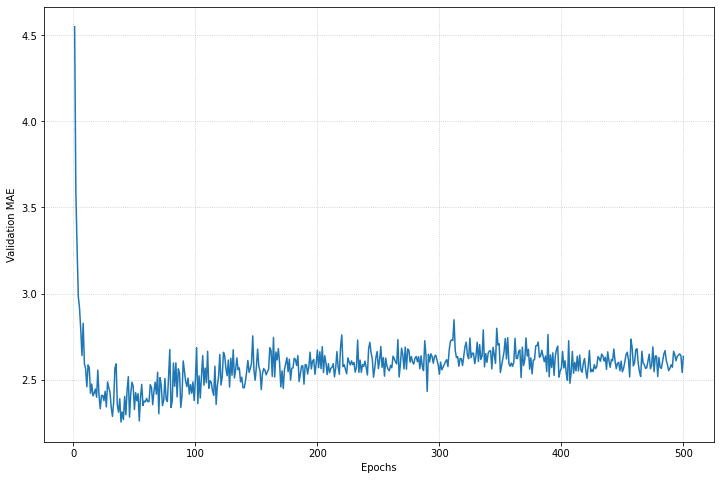

In [90]:
plot_per_epoch_mae(val_mean_absolute_error, epochs = 500)

## Exercise 9: Another plot, more lisible

In [91]:
def exp_moving_avg(points, factor):
  results = np.zeros(len(points))
  results[0] = points[0]

  for i in range(1, len(points)): 
    results[i] = (results[i-1] * factor) + (points[i] * (1 - factor))
    
  return results

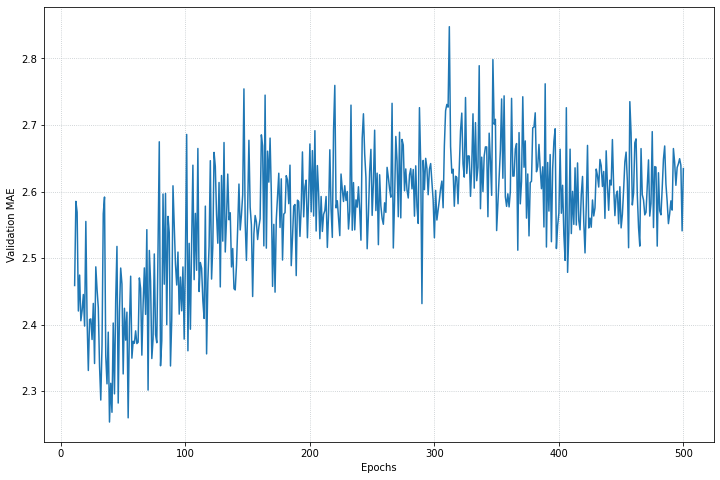

In [92]:
# Before replacing points using an exponential moving average
plot_per_epoch_mae(val_mean_absolute_error, epochs = 500, omit = 10)

In [93]:
exp_val_mean_absolute_error = exp_moving_avg(val_mean_absolute_error, factor=0.85)

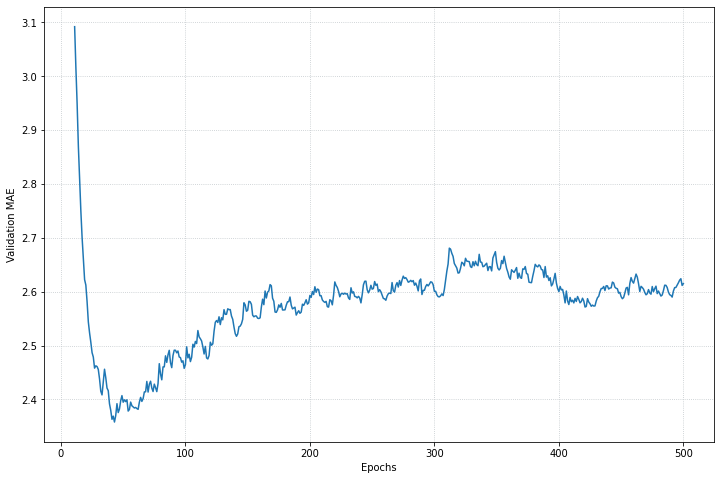

In [94]:
plot_per_epoch_mae(exp_val_mean_absolute_error, epochs = 500, omit = 10)

## Exercise 10: Tuning parameters of the model

In [98]:
hidden_layer_units = 2 ** np.arange(3, 8)
scores = []

for i in hidden_layer_units:
  print(f'Number of units per hidden layers: {i}')
  print(f'-'*25)

  all_scores, mae_history = cross_validation(x_train, y_train, k = 4, epochs = 100, units_per_hidden_layers = i, verbose=0)
  scores.append(all_scores.mean())


Number of units per hidden layers: 8
-------------------------
Processing fold #1/4
Time: 30s - MAE value: 2.0536
Processing fold #2/4
Time: 30s - MAE value: 2.1673
Processing fold #3/4
Time: 31s - MAE value: 2.475
Processing fold #4/4
Time: 30s - MAE value: 2.6997
Number of units per hidden layers: 16
-------------------------
Processing fold #1/4
Time: 30s - MAE value: 2.2535
Processing fold #2/4
Time: 31s - MAE value: 2.5004
Processing fold #3/4
Time: 30s - MAE value: 2.5683
Processing fold #4/4
Time: 30s - MAE value: 2.3818
Number of units per hidden layers: 32
-------------------------
Processing fold #1/4
Time: 30s - MAE value: 2.109
Processing fold #2/4
Time: 30s - MAE value: 2.4433
Processing fold #3/4
Time: 30s - MAE value: 2.4568
Processing fold #4/4
Time: 30s - MAE value: 2.4823
Number of units per hidden layers: 64
-------------------------
Processing fold #1/4
Time: 30s - MAE value: 2.0691
Processing fold #2/4
Time: 30s - MAE value: 2.7452
Processing fold #3/4
Time: 30s - 

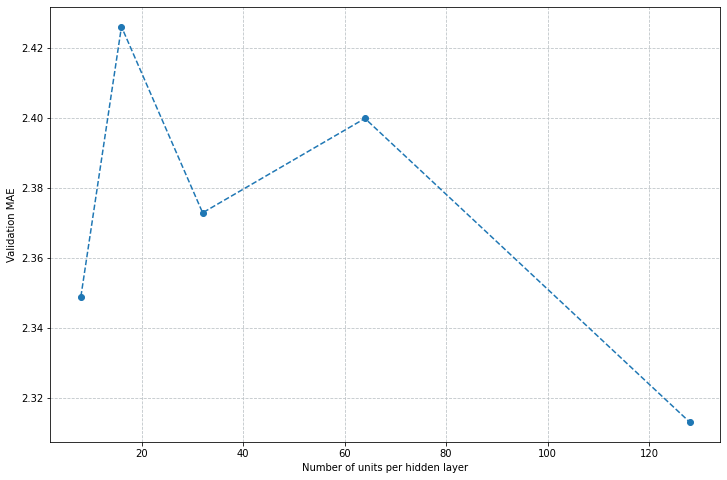

In [99]:
plt.figure(figsize=(12, 8))
plt.plot(hidden_layer_units, scores, linestyle='dashed', marker='o')
plt.xlabel('Number of units per hidden layer')
plt.ylabel('Validation MAE')
plt.grid(b=True, which='major', color='#bdc3c7', linestyle='--')
plt.show()

In [100]:
final_model = build_model(128)

In [101]:
final_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 536.3233 - mae: 21.2732
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 354.7191 - mae: 16.7534
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 200.3201 - mae: 12.1023
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 90.7543 - mae: 7.4360
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 49.4022 - mae: 5.4053
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 36.8259 - mae: 4.3477
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 28.0460 - mae: 3.7853
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 23.9330 - mae: 3.4099
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 24.9236 - mae: 3.3811
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 18.8840 - mae: 2.9653
Epoch 11/100
13/13 [=======================

In [102]:
# testing the model with the training data
val_mse, val_mae = final_model.evaluate(x_test, y_test, verbose=0)
print(f'MSE: {val_mse} - MAE: {val_mae}')

MSE: 16.0320987701416 - MAE: 2.71100115776062


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=62eda4a8-d26a-4a56-8c6c-5473bb99037f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>